# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [170]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [171]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [172]:
plt.rcParams["figure.figsize"] = (10, 5)


In [173]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [174]:
import pandas as pd 

surf_df = pd.read_excel("years/WSL mens championship tour 2010.xlsx", skiprows=2)

surf_df.head()


Rank Unnamed: 1  Unnamed: 2           Name    1      2     3      4     5   \
0   1.0          -         NaN   Kelly Slater  3750  10000  8000   1750  6500   
1   NaN        NaN         NaN  United States   NaN    NaN   NaN    NaN   NaN   
2   2.0          -         NaN    Jordy Smith  8000   5250  5250  10000  1750   
3   NaN        NaN         NaN   South Africa   NaN    NaN   NaN    NaN   NaN   
4   3.0          -         NaN   Mick Fanning  3750   8000  3750   3750  3750   

      6      7      8      9    10   Total Points  
0  10000   8000  10000  10000  6500       69000.0  
1    NaN    NaN    NaN    NaN   NaN           NaN  
2   5250   5250   8000   5250  5250       52250.0  
3    NaN    NaN    NaN    NaN   NaN           NaN  
4   6500  10000   1750   5250  1750       44750.0

In [175]:
"WSL mens championship tour 2010.xlsx".rstrip(".xlsx")

'WSL mens championship tour 2010'

In [78]:
import os
import pandas as pd
from datetime import datetime

year_frames = []

for year_data_path in os.listdir("years"):
    this_year = pd.read_excel(f"years/{year_data_path}", skiprows=2)
    this_year["year_dt"] = this_year["year_dt"].str.rstrip('.xlsx')  # Apply rstrip to a specific column
    year_int = int(year_data_path.split(" ")[4].rstrip(".xlsx"))
    this_year["year"] = year_int
    this_year["year_dt"] = datetime(year=year_int, month=6, day=1)
    year_frames.append(this_year)

KeyError: 'year_dt'

In [200]:
year_frames = []
for year_data_path in os.listdir("years"):
    this_year = pd.read_excel(f"years/{year_data_path}", skiprows=2)
    year_int = int(year_data_path.rstrip(".xlsx").split(" ")[4])
    this_year["year"] = year_int
    this_year["year_dt"] = datetime(year=year_int, month=6, day=1)
    year_frames.append(this_year)

surf_df = pd.concat(year_frames)
surf_df.head()



Rank Unnamed: 1  Unnamed: 2           Name    1      2     3      4     5   \
0   1.0          -         NaN   Kelly Slater  3750  10000  8000   1750  6500   
1   NaN        NaN         NaN  United States   NaN    NaN   NaN    NaN   NaN   
2   2.0          -         NaN    Jordy Smith  8000   5250  5250  10000  1750   
3   NaN        NaN         NaN   South Africa   NaN    NaN   NaN    NaN   NaN   
4   3.0          -         NaN   Mick Fanning  3750   8000  3750   3750  3750   

      6      7      8      9    10   Total Points  year    year_dt  11   \
0  10000   8000  10000  10000  6500       69000.0  2010 2010-06-01  NaN   
1    NaN    NaN    NaN    NaN   NaN           NaN  2010 2010-06-01  NaN   
2   5250   5250   8000   5250  5250       52250.0  2010 2010-06-01  NaN   
3    NaN    NaN    NaN    NaN   NaN           NaN  2010 2010-06-01  NaN   
4   6500  10000   1750   5250  1750       44750.0  2010 2010-06-01  NaN   

   Regular Season Total Points  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [177]:
surf_df.head()

surf_df.columns


Index(['Rank', 'Unnamed: 1', 'Unnamed: 2', 'Name', '1 ', '2 ', '3 ', '4 ',
       '5 ', '6 ', '7 ', '8 ', '9 ', '10 ', 'Total Points', 'year', 'year_dt',
       '11 ', 'Regular Season Total Points'],
      dtype='object')

`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [203]:
surf_df.drop(['Unnamed: 1', 'Unnamed: 2', '11 ', 'Regular Season Total Points'], inplace=True, errors="ignore")

surf_df.head()

Rank Unnamed: 1  Unnamed: 2           Name    1      2     3      4     5   \
0   1.0          -         NaN   Kelly Slater  3750  10000  8000   1750  6500   
1   NaN        NaN         NaN  United States   NaN    NaN   NaN    NaN   NaN   
2   2.0          -         NaN    Jordy Smith  8000   5250  5250  10000  1750   
3   NaN        NaN         NaN   South Africa   NaN    NaN   NaN    NaN   NaN   
4   3.0          -         NaN   Mick Fanning  3750   8000  3750   3750  3750   

      6      7      8      9    10   Total Points  year    year_dt  11   \
0  10000   8000  10000  10000  6500       69000.0  2010 2010-06-01  NaN   
1    NaN    NaN    NaN    NaN   NaN           NaN  2010 2010-06-01  NaN   
2   5250   5250   8000   5250  5250       52250.0  2010 2010-06-01  NaN   
3    NaN    NaN    NaN    NaN   NaN           NaN  2010 2010-06-01  NaN   
4   6500  10000   1750   5250  1750       44750.0  2010 2010-06-01  NaN   

   Regular Season Total Points  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [202]:
surfers = []
for i, row in surf_df.iterrows():
    if i%2==0:
        named_surfer = row.to_dict()
        named_surfer["country"] = surf_df.iloc[i+1].Name
        surfers.append(named_surfer)

clean_surf_df = pd.DataFrame(surfers).head()
clean_surf_df.head()

Rank Unnamed: 1  Unnamed: 2           Name     1      2     3      4   \
0   1.0          -         NaN   Kelly Slater   3750  10000  8000   1750   
1   2.0          -         NaN    Jordy Smith   8000   5250  5250  10000   
2   3.0          -         NaN   Mick Fanning   3750   8000  3750   3750   
3   4.0          -         NaN  Dane Reynolds   6500   1750  6500   5250   
4   4.0          -         NaN     Taj Burrow  10000   6500  1750   6500   

     5      6      7      8      9    10   Total Points  year    year_dt  11   \
0  6500  10000   8000  10000  10000  6500       69000.0  2010 2010-06-01  NaN   
1  1750   5250   5250   8000   5250  5250       52250.0  2010 2010-06-01  NaN   
2  3750   6500  10000   1750   5250  1750       44750.0  2010 2010-06-01  NaN   
3  3750   6500   1750    500   5250  6500       42000.0  2010 2010-06-01  NaN   
4   500   5250   1750   1750   6500  3750       42000.0  2010 2010-06-01  NaN   

   Regular Season Total Points        country  
0                          NaN  United States  
1                          NaN   South Africa  
2                          NaN      Australia  
3                          NaN  United States  
4                          NaN      Australia

In [201]:
surf_df.sample(5)


Rank Unnamed: 1  Unnamed: 2            Name     1     2     3     4   \
48  25.0        NaN         NaN   Kolohe Andino   1750  1750   500   500   
0    1.0        NaN         NaN  Gabriel Medina  10000  5200  4000  1750   
46  24.0          -         NaN  Matt Wilkinson    500  1750  1750  3750   
60  28.0        NaN         NaN  Connor O'Leary   1330  1330   265  1330   
87   NaN        NaN         NaN        Portugal    NaN   NaN   NaN   NaN   

         5     6      7     8     9    10   Total Points  year    year_dt  \
48     1750  1750    500  1750  4000  4000       17750.0  2015 2015-06-01   
0   10000.0  5200  10000  5200  5200  1750       62800.0  2014 2014-06-01   
46     1750  1750    500  3750  1750  1750       18000.0  2010 2010-06-01   
60     3320  1330    265   NaN   NaN   NaN           NaN  2021 2021-06-01   
87      NaN   NaN    NaN   NaN   NaN   NaN           NaN  2016 2016-06-01   

       11   Regular Season Total Points  
48     500                          NaN  
0   8000.0                          NaN  
46     NaN                          NaN  
60     NaN                       8640.0  
87     NaN                          NaN

We can also get the list of columns out of the data frame

In [181]:
surf_df.columns

Index(['Rank', 'Unnamed: 1', 'Unnamed: 2', 'Name', '1 ', '2 ', '3 ', '4 ',
       '5 ', '6 ', '7 ', '8 ', '9 ', '10 ', 'Total Points', 'year', 'year_dt',
       '11 ', 'Regular Season Total Points'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [182]:
row_one = surf_df.iloc[1]
row_one


Rank                                           NaN
Unnamed: 1                                     NaN
Unnamed: 2                                     NaN
Name                                 United States
1                                              NaN
2                                              NaN
3                                              NaN
4                                              NaN
5                                              NaN
6                                              NaN
7                                              NaN
8                                              NaN
9                                              NaN
10                                             NaN
Total Points                                   NaN
year                                          2010
year_dt                        2010-06-01 00:00:00
11                                             NaN
Regular Season Total Points                    NaN
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [206]:
row_two = surf_df.iloc[2]
row_two

Rank                                           2.0
Unnamed: 1                                       -
Unnamed: 2                                     NaN
Name                                   Jordy Smith
1                                             8000
2                                             5250
3                                             5250
4                                            10000
5                                             1750
6                                             5250
7                                             5250
8                                             8000
9                                             5250
10                                            5250
Total Points                               52250.0
year                                          2010
year_dt                        2010-06-01 00:00:00
11                                             NaN
Regular Season Total Points                    NaN
Name: 2, dtype: object

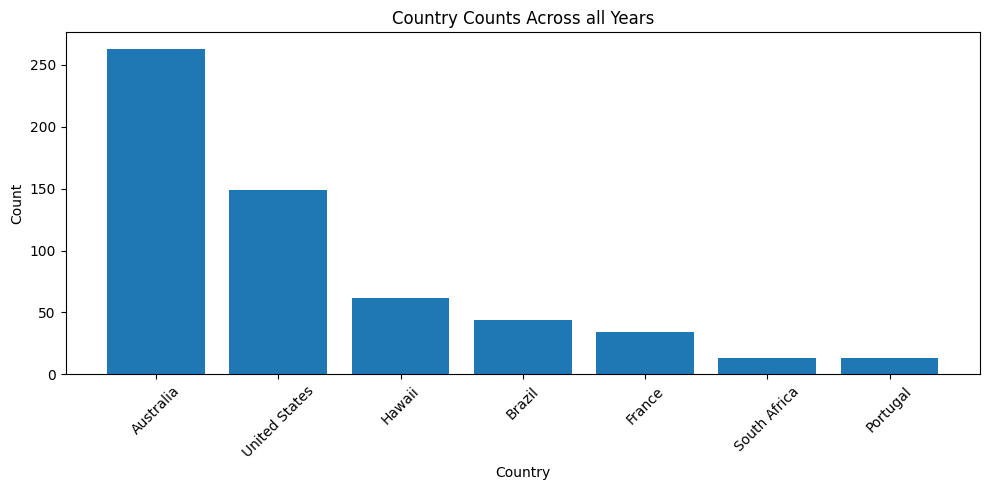

In [321]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame (replace this with your actual data loading)
surf_df = {"years"}
surf_df = pd.DataFrame(surfers)

# Group and count the occurrences of each country
country_counts = surf_df['country'].value_counts()

# Plot a histogram of country counts
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Counts Across all Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

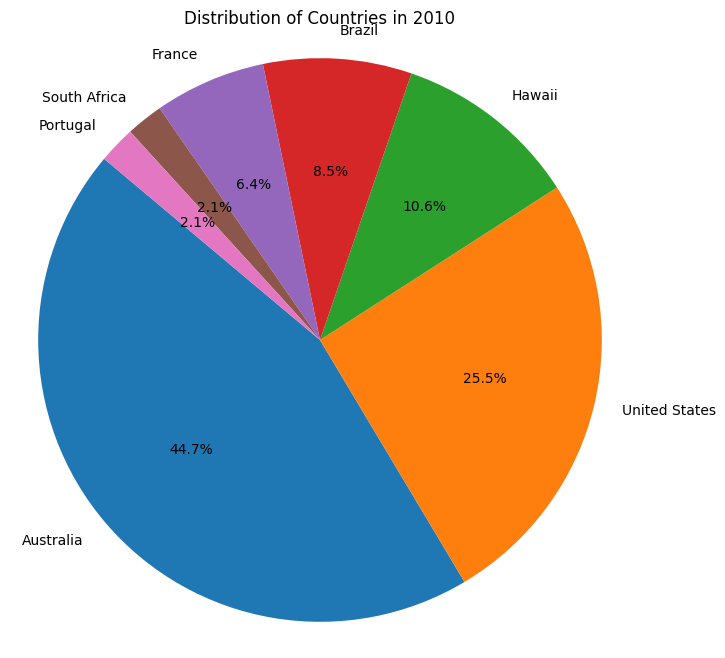

In [322]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file into a DataFrame
surf_df = pd.read_excel("years/WSL mens championship tour 2010.xlsx")

# Create a DataFrame
surf_df = pd.DataFrame(surfers)

# Filter data for the year 2010
data_2010 = surf_df[surf_df['year'] == 2010]

# Count occurrences of each country
country_counts = data_2010['country'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Countries in 2010')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

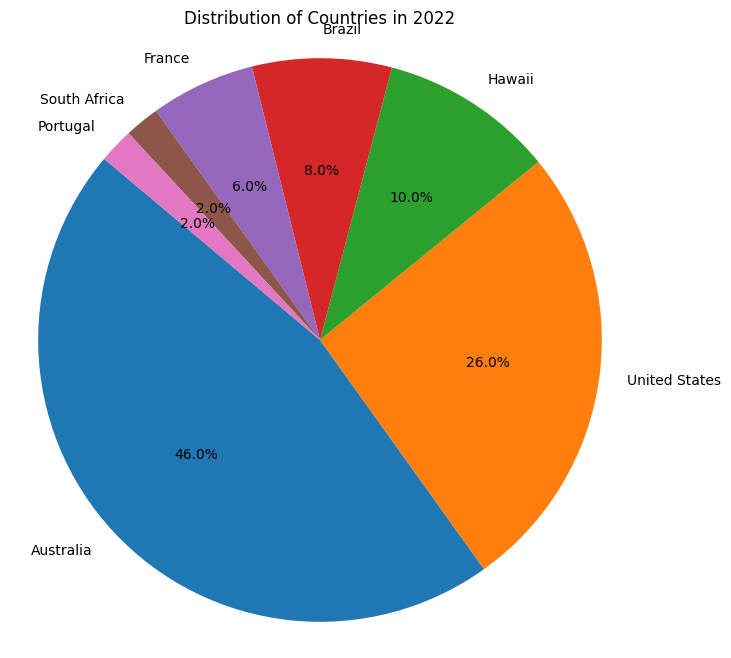

In [323]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file into a DataFrame
surf_df = pd.read_excel("years/WSL mens championship tour 2022.xlsx")

# Create a DataFrame
surf_df = pd.DataFrame(surfers)

# Filter data for the year 2010
data_2022 = surf_df[surf_df['year'] == 2022]

# Count occurrences of each country
country_counts = data_2022['country'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Countries in 2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

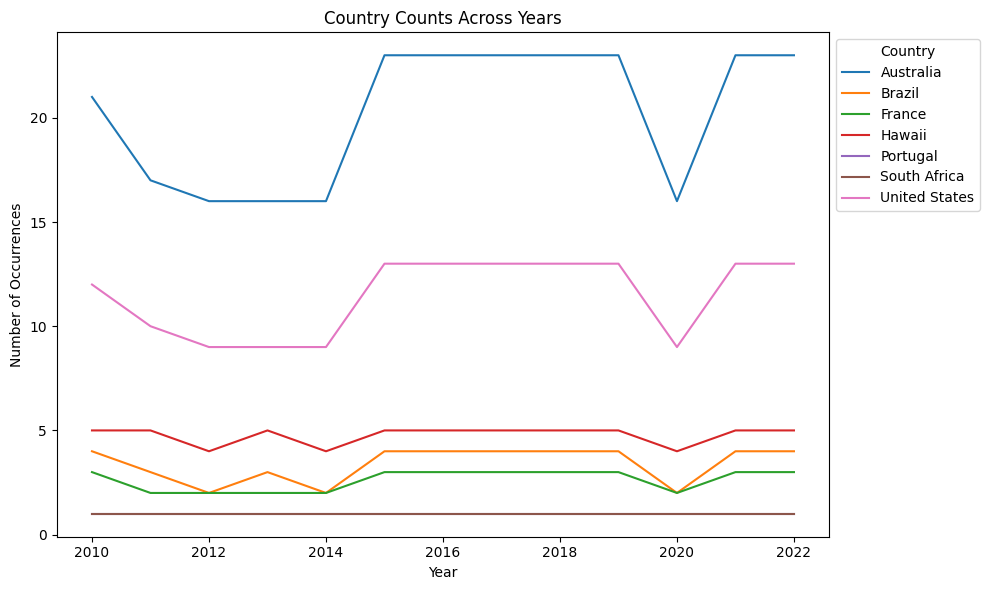

In [324]:
import pandas as pd
import matplotlib.pyplot as plt

surf_df = {"years"}
surf_df = pd.DataFrame(surfers)

# Group by country and year, and count occurrences
country_count_by_year = surf_df.groupby(['country', 'year']).size().reset_index(name='count')

# Pivot the data for better plotting
pivot_table = country_count_by_year.pivot(index='year', columns='country', values='count').fillna(0)

# Create a line chart
pivot_table.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Country Counts Across Years')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

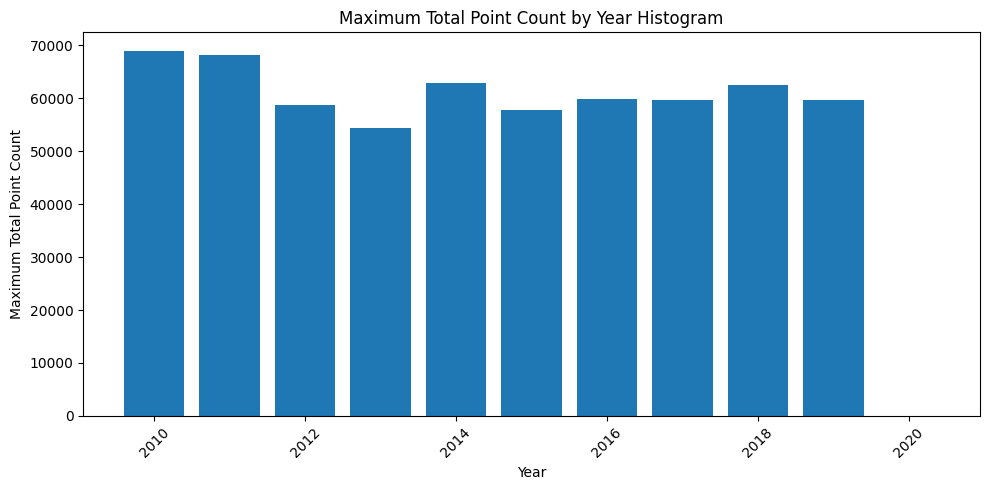

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame (replace this with your actual data loading)
surf_df = {'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'Total_Points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 597400, 0, 43400, 54690]}
surf_df = pd.DataFrame(surfers)

# Group and aggregate maximum total point count for each year
max_point_counts = surf_df.groupby('year')['Total Points'].max()

# Plot a histogram of maximum total point counts for each year
plt.bar(max_point_counts.index, max_point_counts.values)
plt.xlabel('Year')
plt.ylabel('Maximum Total Point Count')
plt.title('Maximum Total Point Count by Year Histogram')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

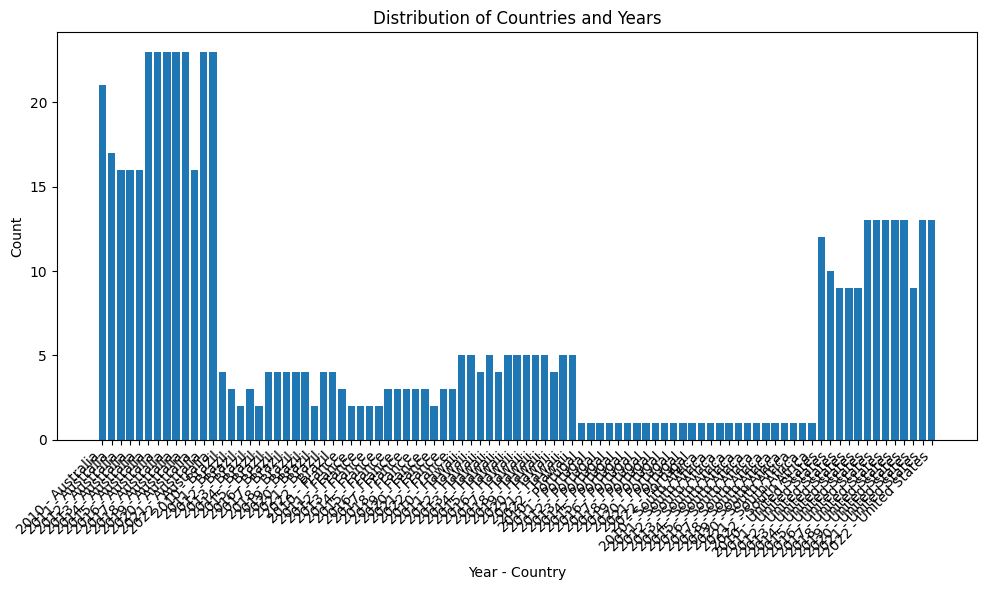

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame (replace this with your actual data loading)
surf_df = {'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'country': ["United States", "United States", "Australia", "Australia", "Brazil", "Brazil", "Hawaii", "Hawaii", "Brazil", "Brazil", " ", "Brazil", "Brazil" ],
        'total_points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 597400, 0, 43400, 54690]}

surf_df = pd.DataFrame(surfers)

# Group by year and country to count occurrences
country_year_counts = surf_df.groupby(['country', 'year']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(country_year_counts['year'].astype(str) + ' - ' + country_year_counts['country'], country_year_counts['count'])
plt.xlabel('Year - Country')
plt.ylabel('Count')
plt.title('Distribution of Countries and Years')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


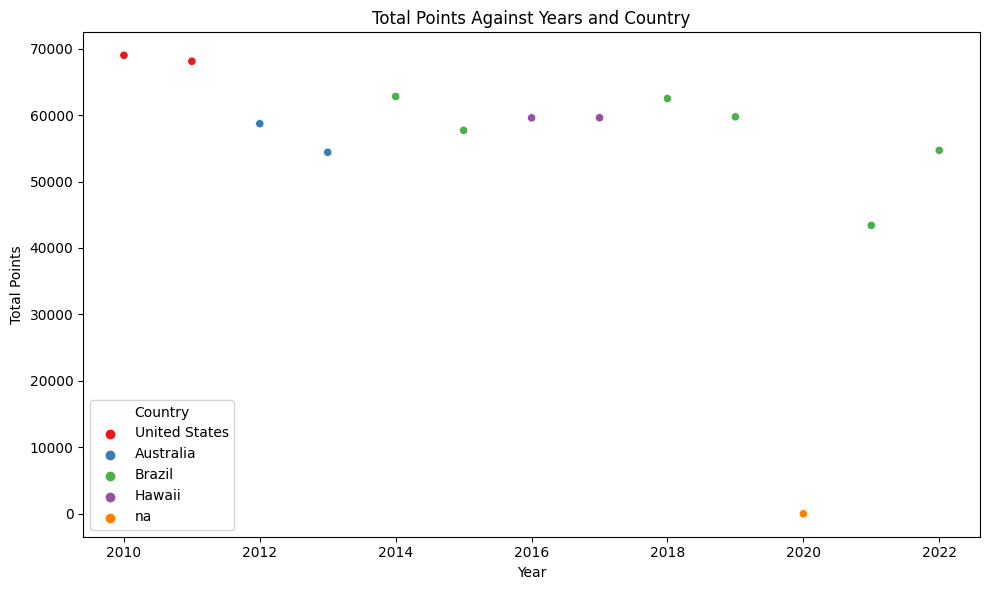

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame
surf_df = {
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'country': ["United States", "United States", "Australia", "Australia", "Brazil", "Brazil", "Hawaii", "Hawaii", "Brazil", "Brazil", "na", "Brazil", "Brazil"],
    'total_points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 59740, 0, 43400, 54690]
}

surf_df = pd.DataFrame(surf_df)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='total_points', hue='country', data=surf_df, palette='Set1', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points Against Years and Country')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


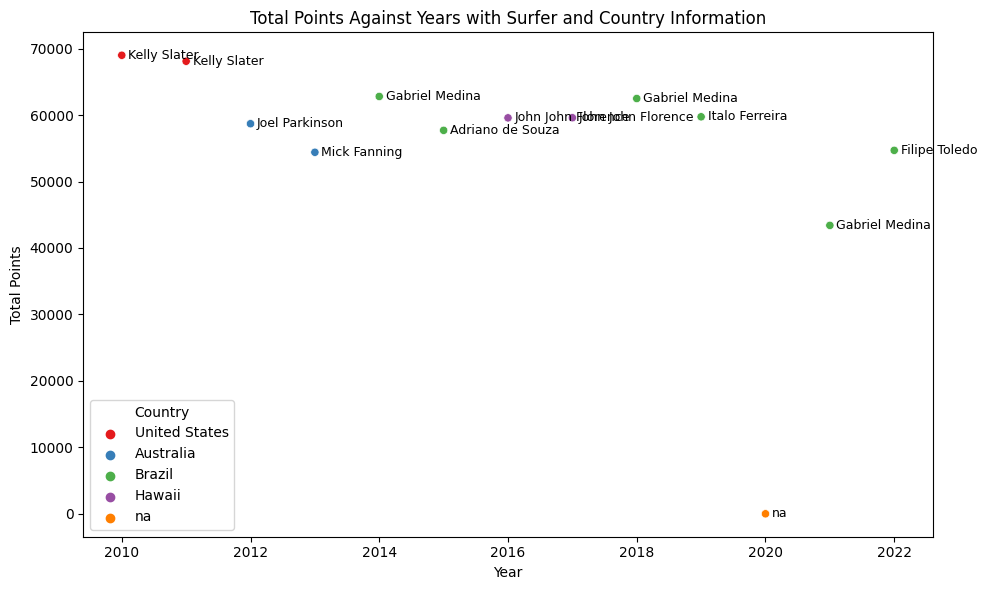

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame (replace this with your actual data loading)
surf_df = {
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'country': ["United States", "United States", "Australia", "Australia", "Brazil", "Brazil", "Hawaii", "Hawaii", "Brazil", "Brazil", "na", "Brazil", "Brazil"],
    'surfer_name': ["Kelly Slater", "Kelly Slater", "Joel Parkinson", "Mick Fanning", "Gabriel Medina", "Adriano de Souza", "John John Florence", "John John Florence", "Gabriel Medina", "Italo Ferreira", "na", "Gabriel Medina", "Filipe Toledo"],
    'total_points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 59740, 0, 43400, 54690]
}

surf_df = pd.DataFrame(surf_df)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='total_points', hue='country', data=surf_df, palette='Set1', marker='o')
for i, row in surf_df.iterrows():
    plt.text(row['year'] + 0.1, row['total_points'], row['surfer_name'], fontsize=9, verticalalignment='center')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points Against Years with Surfer and Country Information')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

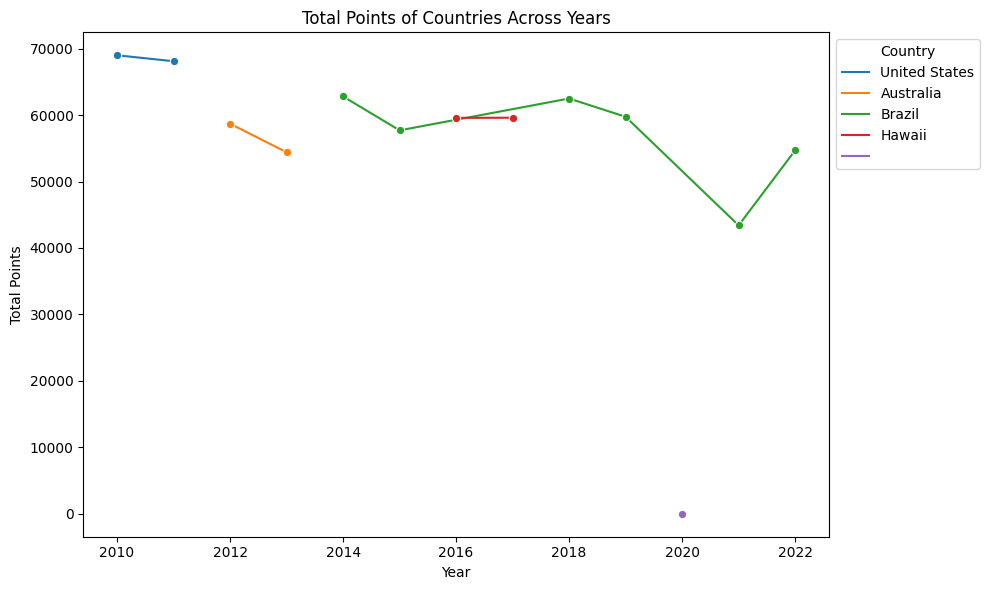

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame (replace this with your actual data loading)
surf_df = {
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'country': ["United States", "United States", "Australia", "Australia", "Brazil", "Brazil", "Hawaii", "Hawaii", "Brazil", "Brazil", " ", "Brazil", "Brazil"],
    'total_points': [69000, 68100, 58700, 54400, 62800, 57700, 59580, 59600, 62490, 59740, 0, 43400, 54690]
}

surf_df = pd.DataFrame(surf_df)

# Create a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='total_points', hue='country', data=surf_df, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points of Countries Across Years')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


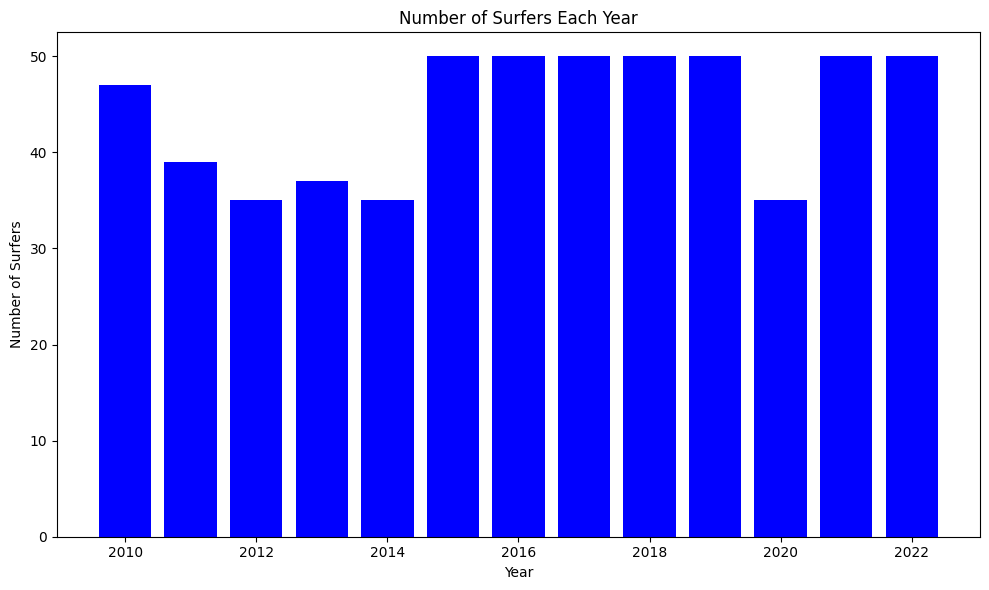

In [339]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file into a DataFrame
surf_df = pd.DataFrame(surfers)

# Group by year and count the number of surfers for each year
surfer_count_by_year = surf_df['year'].value_counts().reset_index()
surfer_count_by_year.columns = ['year', 'surfer_count']

# Sort by year
surfer_count_by_year = surfer_count_by_year.sort_values('year')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(surfer_count_by_year['year'], surfer_count_by_year['surfer_count'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Surfers')
plt.title('Number of Surfers Each Year')
plt.tight_layout()
plt.show()

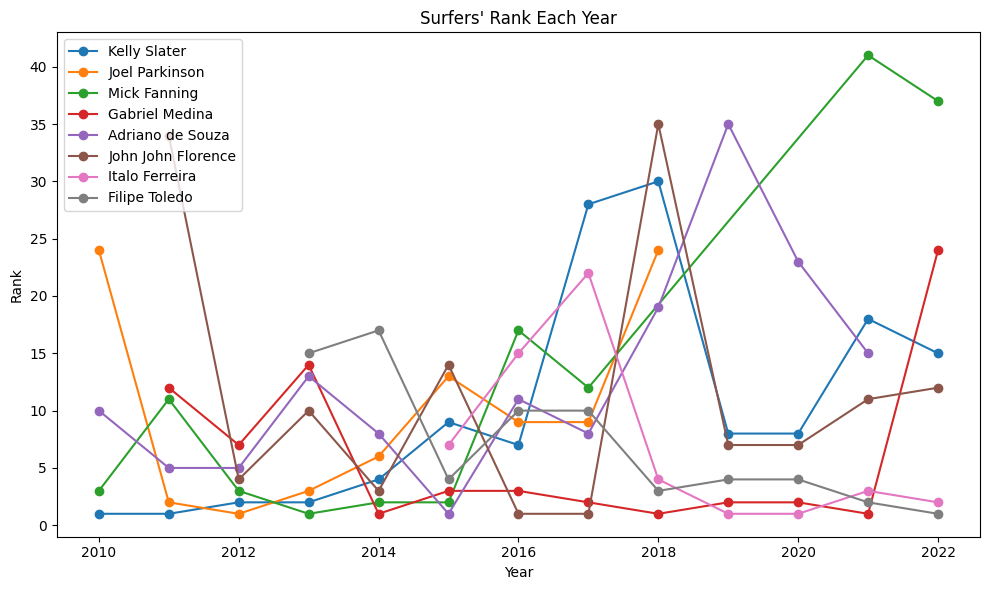

In [353]:
surf_df = pd.DataFrame(surfers)

# Filter data for different surfers
kelly_slater_data = surf_df[surf_df['Name'] == 'Kelly Slater']
joel_parkinson_data = surf_df[surf_df['Name'] == 'Joel Parkinson']
mick_fanning_data = surf_df[surf_df['Name'] == 'Mick Fanning']
gabriel_medina_data = surf_df[surf_df['Name'] == 'Gabriel Medina']
adriano_de_souza_data = surf_df[surf_df['Name'] == 'Adriano de Souza']
john_john_florence_data = surf_df[surf_df['Name'] == 'John John Florence']
italo_ferreira_data = surf_df[surf_df['Name'] == 'Italo Ferreira']
filipe_toledo_data = surf_df[surf_df['Name'] == 'Filipe Toledo']

# Sort data by year for each surfer
kelly_slater_data_sorted = kelly_slater_data.sort_values('year')
joel_parkinson_data_sorted = joel_parkinson_data.sort_values('year')
mick_fanning_data_sorted = mick_fanning_data.sort_values('year')
gabriel_medina_data_sorted = gabriel_medina_data.sort_values('year')
adriano_de_souza_data_sorted = adriano_de_souza_data.sort_values('year')
john_john_florence_data_sorted = john_john_florence_data.sort_values('year')
italo_ferreira_data_sorted = italo_ferreira_data.sort_values('year')
filipe_toledo_data_sorted = filipe_toledo_data.sort_values('year')

# Create a line graph for multiple surfers' rank each year
plt.figure(figsize=(10, 6))

plt.plot(kelly_slater_data_sorted['year'], kelly_slater_data_sorted['Rank'], marker='o', label="Kelly Slater")
plt.plot(joel_parkinson_data_sorted['year'], joel_parkinson_data_sorted['Rank'], marker='o', label="Joel Parkinson")
plt.plot(mick_fanning_data_sorted['year'], mick_fanning_data_sorted['Rank'], marker='o', label="Mick Fanning")
plt.plot(gabriel_medina_data_sorted['year'], gabriel_medina_data_sorted['Rank'], marker='o', label="Gabriel Medina")
plt.plot(adriano_de_souza_data_sorted['year'], adriano_de_souza_data_sorted['Rank'], marker='o', label="Adriano de Souza")
plt.plot(john_john_florence_data_sorted['year'], john_john_florence_data_sorted['Rank'], marker='o', label="John John Florence")
plt.plot(italo_ferreira_data_sorted['year'], italo_ferreira_data_sorted['Rank'], marker='o', label="Italo Ferreira")
plt.plot(filipe_toledo_data_sorted['year'], filipe_toledo_data_sorted['Rank'], marker='o', label="Filipe Toledo")

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Surfers' Rank Each Year")
plt.legend()
plt.tight_layout()
plt.show()

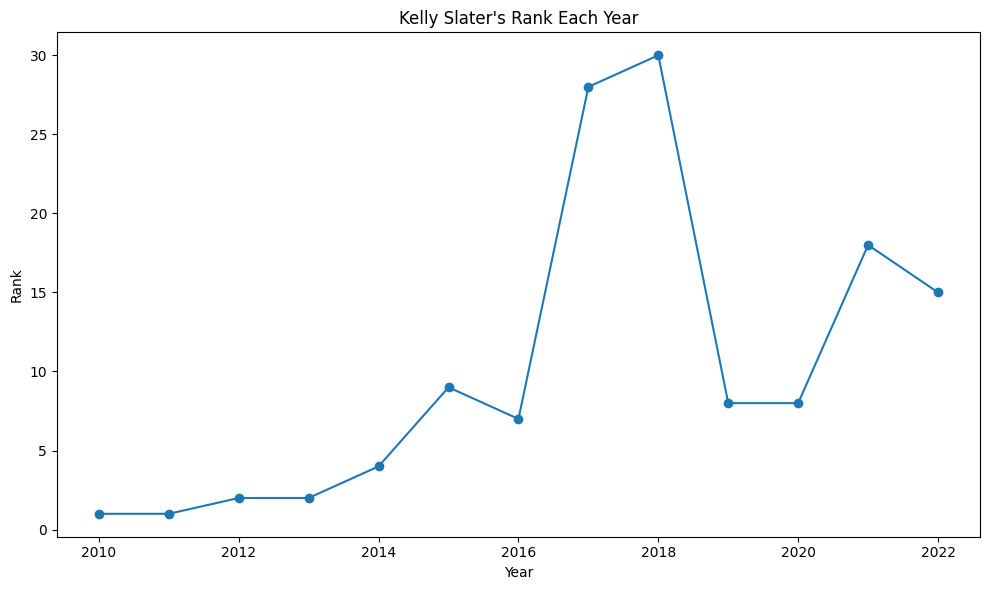

In [342]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file into a DataFrame
surf_df = pd.DataFrame(surfers)

# Filter data for Kelly Slater
kelly_slater_data = surf_df[surf_df['Name'] == 'Kelly Slater']

# Sort Kelly Slater's data by year
kelly_slater_data_sorted = kelly_slater_data.sort_values('year')

# Create a line graph for Kelly Slater's rank each year
plt.figure(figsize=(10, 6))
plt.plot(kelly_slater_data_sorted['year'], kelly_slater_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Kelly Slater's Rank Each Year")
plt.tight_layout()
plt.show()

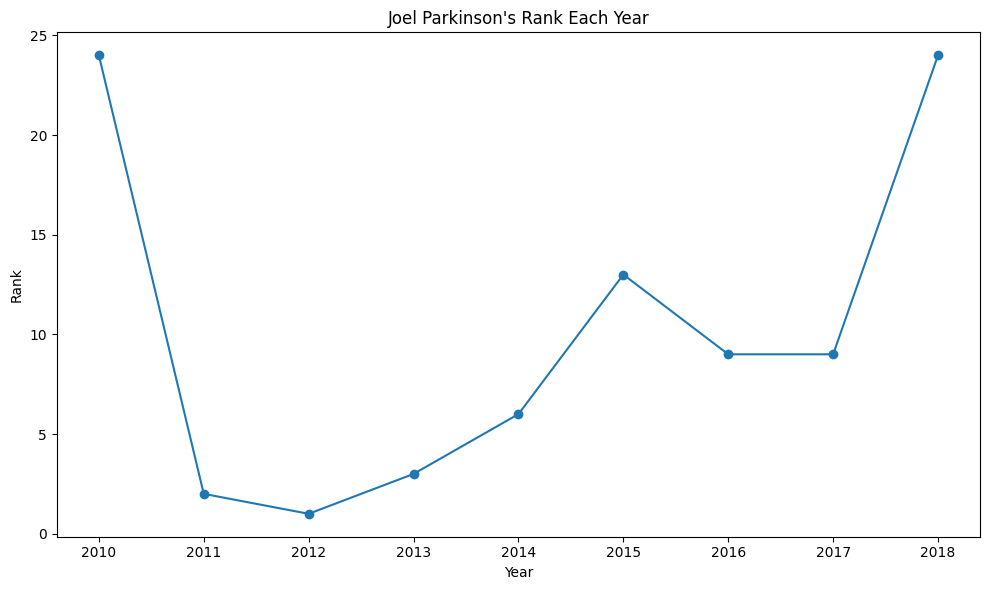

In [343]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file into a DataFrame
surf_df = pd.DataFrame(surfers)

# Filter data for Kelly Slater
joel_parkinson_data = surf_df[surf_df['Name'] == 'Joel Parkinson']

# Sort Kelly Slater's data by year
joel_parkinson_data_sorted = joel_parkinson_data.sort_values('year')

# Create a line graph for Kelly Slater's rank each year
plt.figure(figsize=(10, 6))
plt.plot(joel_parkinson_data_sorted['year'], joel_parkinson_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Joel Parkinson's Rank Each Year")
plt.tight_layout()
plt.show()

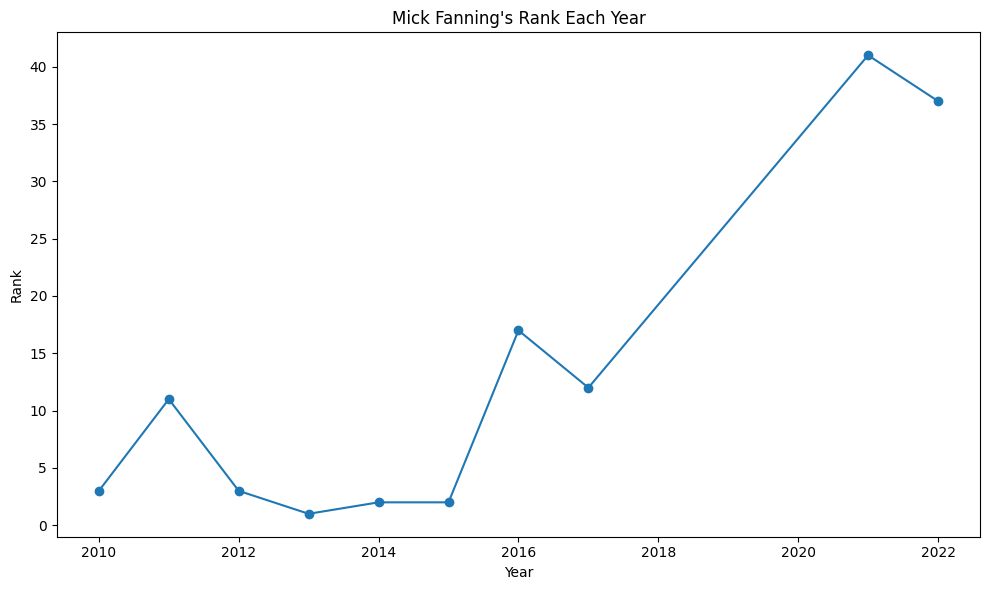

In [344]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file into a DataFrame
surf_df = pd.DataFrame(surfers)

# Filter data for Mick Fanning
mick_fanning_data = surf_df[surf_df['Name'] == 'Mick Fanning']

# Sort Mick Fanning's data by year
mick_fanning_data_sorted = mick_fanning_data.sort_values('year')

# Create a line graph for Mick Fanning's rank each year
plt.figure(figsize=(10, 6))
plt.plot(mick_fanning_data_sorted['year'], mick_fanning_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Mick Fanning's Rank Each Year")
plt.tight_layout()
plt.show()

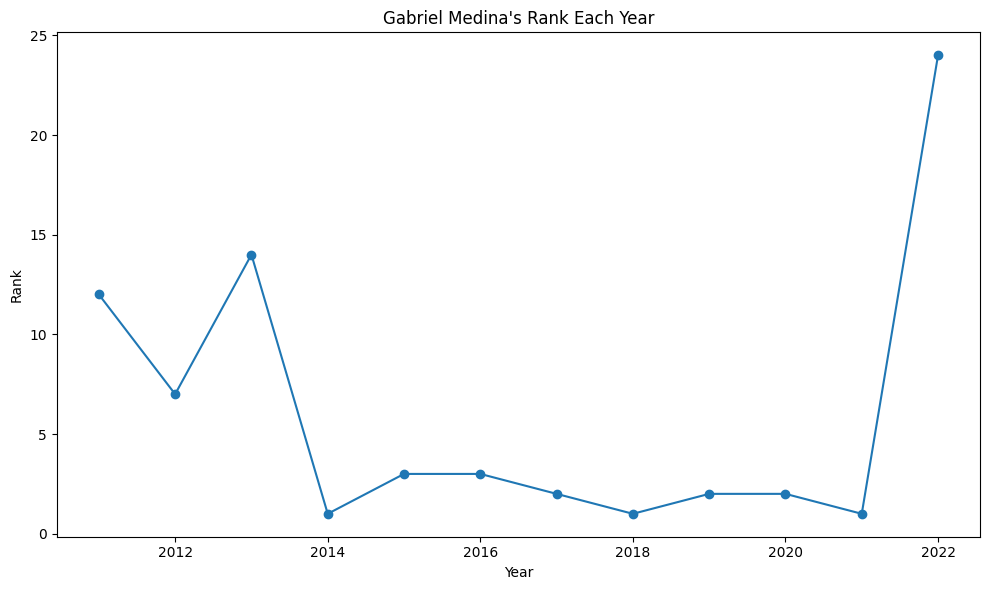

In [345]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file into a DataFrame
surf_df = pd.DataFrame(surfers)

# Filter data for Gabriel Medina
gabriel_medina_data = surf_df[surf_df['Name'] == 'Gabriel Medina']

# Sort Gabriel Medina's data by year
gabriel_medina_data_sorted = gabriel_medina_data.sort_values('year')

# Create a line graph for Gabriel Medina's rank each year
plt.figure(figsize=(10, 6))
plt.plot(gabriel_medina_data_sorted['year'], gabriel_medina_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Gabriel Medina's Rank Each Year")
plt.tight_layout()
plt.show()

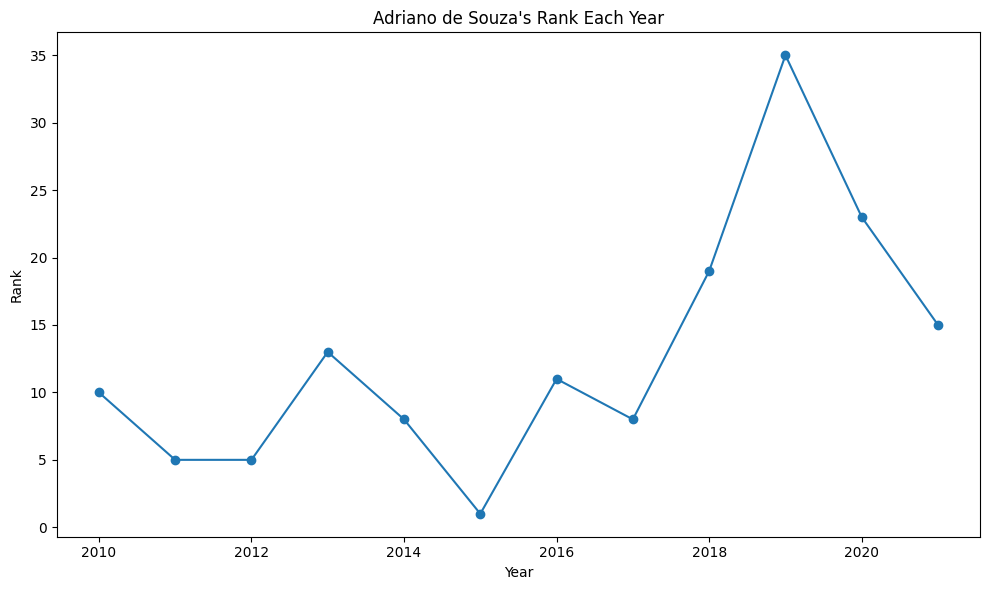

In [346]:
surf_df = pd.DataFrame(surfers)

# Filter data for Adriano de Souza
adriano_de_souza_data = surf_df[surf_df['Name'] == 'Adriano de Souza']

# Sort Adriano de Souza's data by year
adriano_de_souza_data_sorted = adriano_de_souza_data.sort_values('year')

# Create a line graph for Adriano de Souza's rank each year
plt.figure(figsize=(10, 6))
plt.plot(adriano_de_souza_data_sorted['year'], adriano_de_souza_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Adriano de Souza's Rank Each Year")
plt.tight_layout()
plt.show()

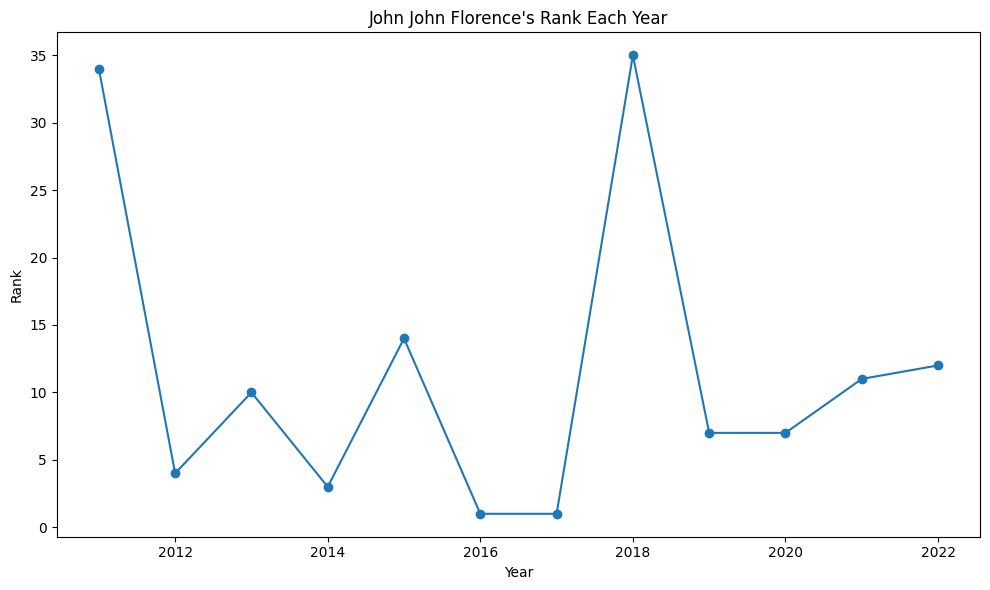

In [347]:
surf_df = pd.DataFrame(surfers)

# Filter data for John John Florence
john_john_florence_data = surf_df[surf_df['Name'] == 'John John Florence']

# Sort John John Florence's data by year
john_john_florence_data_sorted = john_john_florence_data.sort_values('year')

# Create a line graph for John John Florence's rank each year
plt.figure(figsize=(10, 6))
plt.plot(john_john_florence_data_sorted['year'], john_john_florence_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("John John Florence's Rank Each Year")
plt.tight_layout()
plt.show()


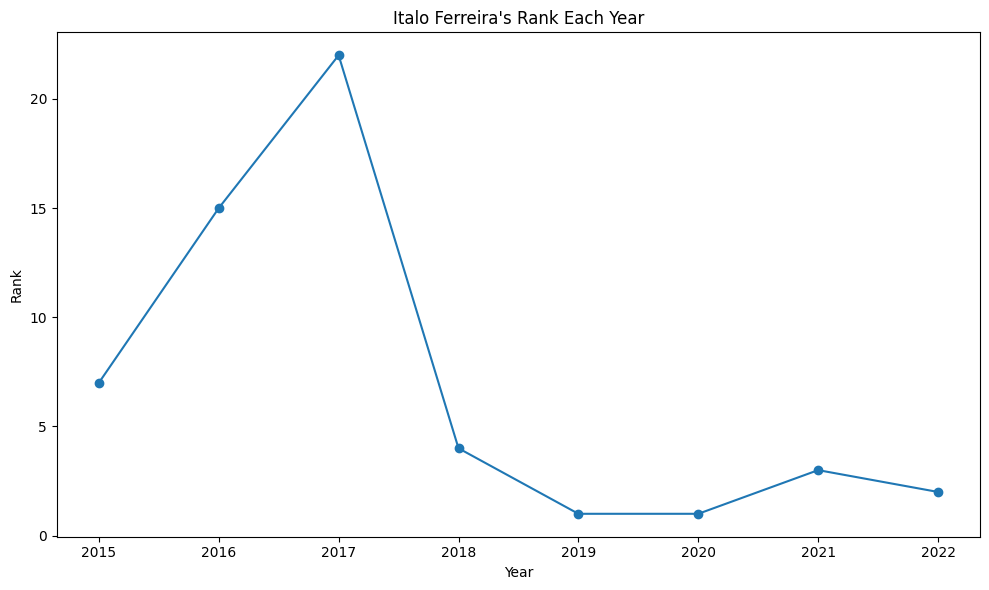

In [348]:
surf_df = pd.DataFrame(surfers)

# Filter data for Italo Ferreira
italo_ferreira_data = surf_df[surf_df['Name'] == 'Italo Ferreira']

# Sort Italo Ferreira's data by year
italo_ferreira_data_sorted = italo_ferreira_data.sort_values('year')

# Create a line graph for Italo Ferreira's rank each year
plt.figure(figsize=(10, 6))
plt.plot(italo_ferreira_data_sorted['year'], italo_ferreira_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Italo Ferreira's Rank Each Year")
plt.tight_layout()
plt.show()

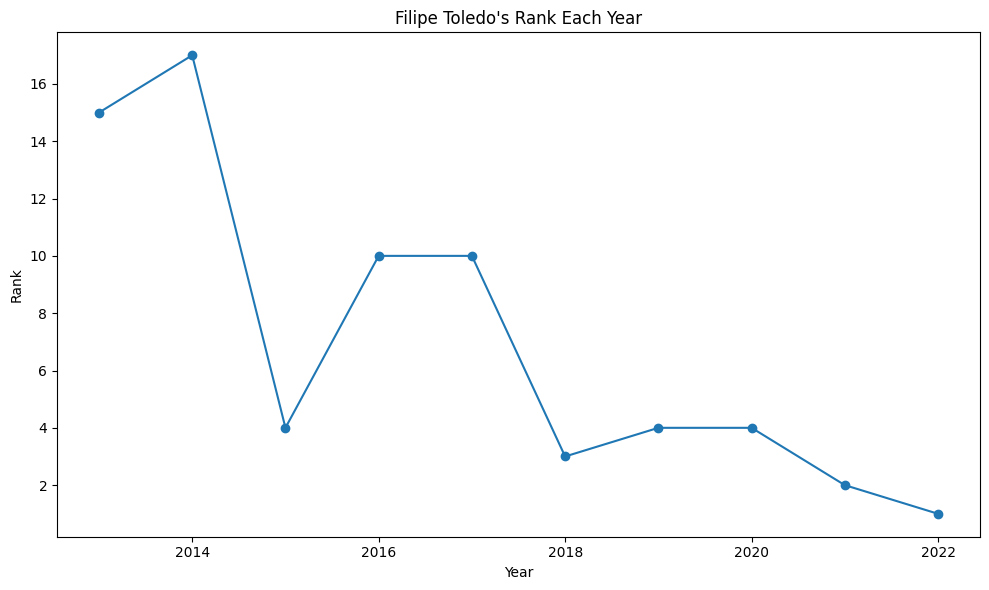

In [350]:
surf_df = pd.DataFrame(surfers)

# Filter data for Filipe Toledo
filipe_toledo_data = surf_df[surf_df['Name'] == 'Filipe Toledo']

# Sort Filipe Toledo's data by year
filipe_toledo_data_sorted = filipe_toledo_data.sort_values('year')

# Create a line graph for Filipe Toledo's rank each year
plt.figure(figsize=(10, 6))
plt.plot(filipe_toledo_data_sorted['year'], filipe_toledo_data_sorted['Rank'], marker='o')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Filipe Toledo's Rank Each Year")
plt.tight_layout()
plt.show()

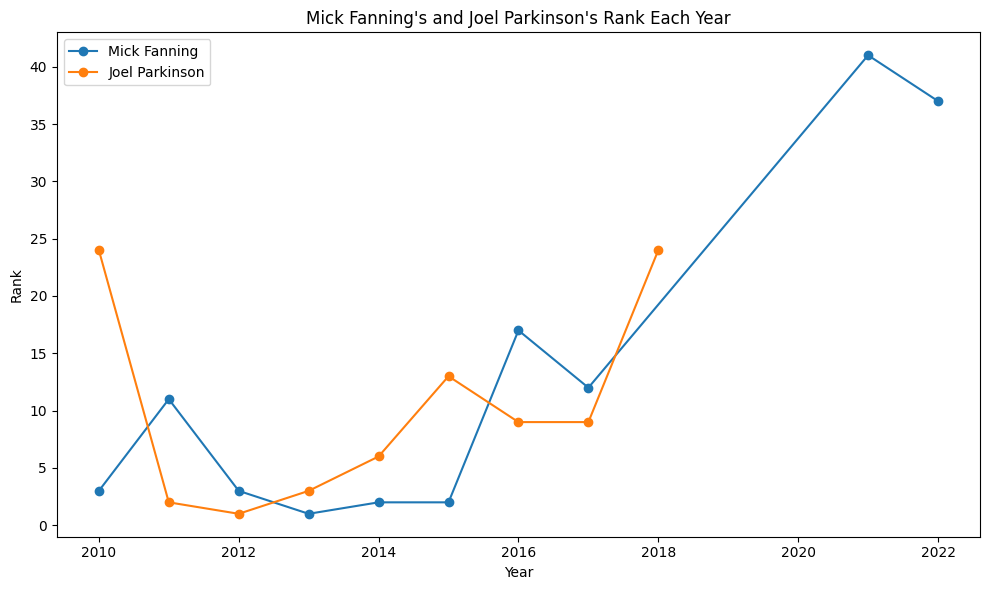

In [354]:
surf_df = pd.DataFrame(surfers)

# Filter data for Mick Fanning
mick_fanning_data = surf_df[surf_df['Name'] == 'Mick Fanning']

# Filter data for Joel Parkinson
joel_parkinson_data = surf_df[surf_df['Name'] == 'Joel Parkinson']

# Sort data by year for each surfer
mick_fanning_data_sorted = mick_fanning_data.sort_values('year')
joel_parkinson_data_sorted = joel_parkinson_data.sort_values('year')

# Create a line graph for Mick Fanning's rank each year
plt.figure(figsize=(10, 6))
plt.plot(mick_fanning_data_sorted['year'], mick_fanning_data_sorted['Rank'], marker='o', label="Mick Fanning")

# Create a line graph for Joel Parkinson's rank each year
plt.plot(joel_parkinson_data_sorted['year'], joel_parkinson_data_sorted['Rank'], marker='o', label="Joel Parkinson")

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Mick Fanning's and Joel Parkinson's Rank Each Year")
plt.legend()
plt.tight_layout()
plt.show()

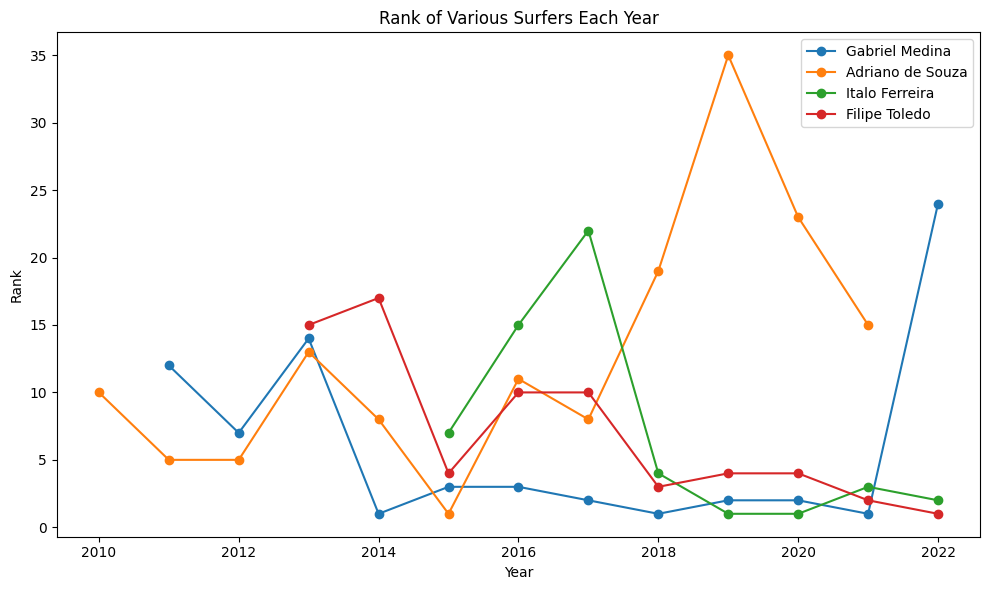

In [355]:
surf_df = pd.DataFrame(surfers)

# Filter data for Gabriel Medina
gabriel_medina_data = surf_df[surf_df['Name'] == 'Gabriel Medina']

# Filter data for Adriano de Souza
adriano_de_souza_data = surf_df[surf_df['Name'] == 'Adriano de Souza']

# Filter data for Italo Ferreira
italo_ferreira_data = surf_df[surf_df['Name'] == 'Italo Ferreira']

# Filter data for Filipe Toledo
filipe_toledo_data = surf_df[surf_df['Name'] == 'Filipe Toledo']

# Sort data by year for each surfer
gabriel_medina_data_sorted = gabriel_medina_data.sort_values('year')
adriano_de_souza_data_sorted = adriano_de_souza_data.sort_values('year')
italo_ferreira_data_sorted = italo_ferreira_data.sort_values('year')
filipe_toledo_data_sorted = filipe_toledo_data.sort_values('year')

# Create a line graph for Gabriel Medina's rank each year
plt.figure(figsize=(10, 6))
plt.plot(gabriel_medina_data_sorted['year'], gabriel_medina_data_sorted['Rank'], marker='o', label="Gabriel Medina")

# Create a line graph for Adriano de Souza's rank each year
plt.plot(adriano_de_souza_data_sorted['year'], adriano_de_souza_data_sorted['Rank'], marker='o', label="Adriano de Souza")

# Create a line graph for Italo Ferreira's rank each year
plt.plot(italo_ferreira_data_sorted['year'], italo_ferreira_data_sorted['Rank'], marker='o', label="Italo Ferreira")

# Create a line graph for Filipe Toledo's rank each year
plt.plot(filipe_toledo_data_sorted['year'], filipe_toledo_data_sorted['Rank'], marker='o', label="Filipe Toledo")

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title("Rank of Various Surfers Each Year")
plt.legend()
plt.tight_layout()
plt.show()

In [183]:
surf_df = row_one["country"]

KeyError: 'country'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [ ]:
row_one.COUNTRY

AttributeError: 'Series' object has no attribute 'COUNTRY'

Doing the same thing on a dataframe gives us the whole column

In [ ]:
surf_df.["COUNTRY"]

SyntaxError: invalid syntax (1429652557.py, line 1)

In [ ]:
surf_df["COUNTRY"].plot()

KeyError: 'COUNTRY'

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

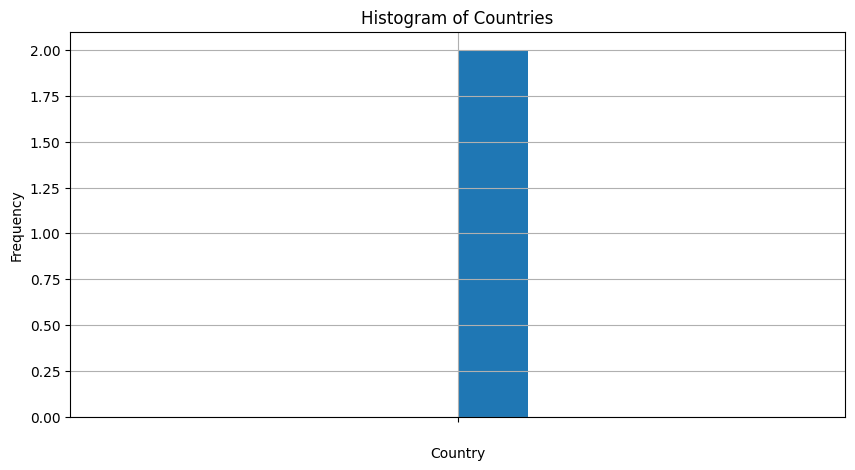

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame (replace this with your actual data loading)
surf_df = {'country': [" ", " "]}
surf_df = pd.DataFrame(surf_df)

# Create a histogram of the 'country' column
surf_df['country'].hist()

# Display the histogram
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Histogram of Countries')
plt.show()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<AxesSubplot:>

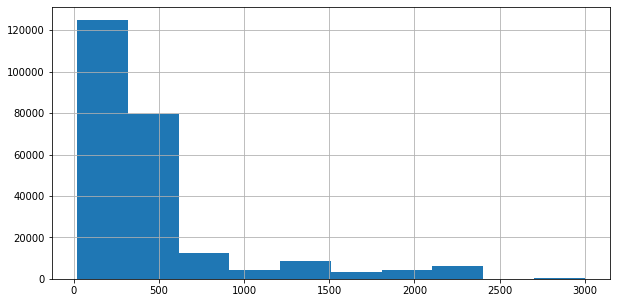

In [ ]:
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 3000].hist()


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [ ]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [ ]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [ ]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


0      0
1      1
2      2
3      3
97    97
98    98
99    99
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [ ]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [ ]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [ ]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [ ]:
[p.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT\xa0AND\xa0LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [ ]:
[p for p in pets if len(p) == 4]


['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [ ]:
[p.upper() for p in pets if len(p) == 5]


['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'All fines under $3000')

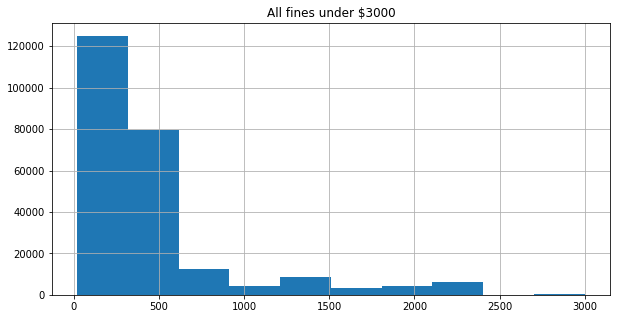

In [ ]:
upper_bound = 3000
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


Let's see what's under $1000

Text(0.5, 1.0, 'All fines under $1000')

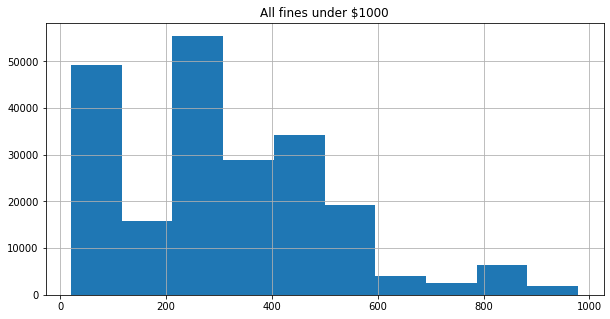

In [ ]:
upper_bound = 1000
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [ ]:
penalty_data.head(2)

OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    01/07/2011         74731   
1       2011-2012    01/07/2011          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... RED_LIGHT_CAMERA_IND SPEED_CAMERA_IND SEATBELT_IND  \
0         7163.0  ...                    Y              NaN          NaN   
1            NaN  ...                  NaN              NaN          NaN   

  MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0              NaN         NaN      NaN      NaN                 NaN   
1              NaN           Y      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE  
0           46       16238  
1           78       20670  

[2 rows x 25 columns]

We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
penalty_data.LEGISLATION.value_counts()

ROAD RULES 2008                                              103558
ROAD RULES 2014                                               88546
PASSENGER TRANSPORT REGULATION 2007                            4446
ROAD TRANSPORT (VEHICLE REGISTRATION) REGULATION 2007          4185
PROTECTION OF THE ENVIRONMENT OPERATIONS ACT 1997              3070
                                                              ...  
HEMP INDUSTRY ACT 2008                                            1
NON-INDIGENOUS ANIMALS ACT 1987                                   1
FOOD REGULATION 2015                                              1
CHILDREN AND YOUNG PERSONS (CARE AND PROTECTION) ACT 1998         1
SPORTING VENUES AUTHORITIES REGULATION 2014                       1
Name: LEGISLATION, Length: 211, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<AxesSubplot:>

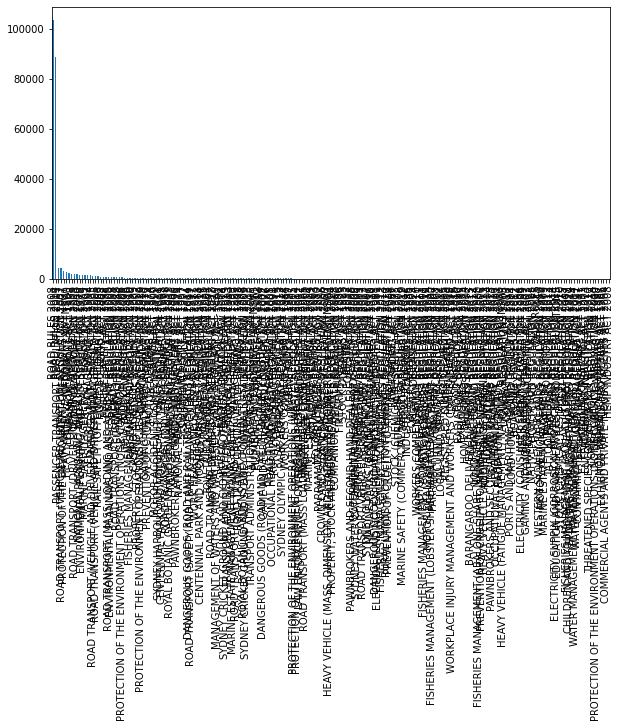

In [ ]:
pdvc = penalty_data.LEGISLATION.value_counts() # This makes a series
pdvc.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

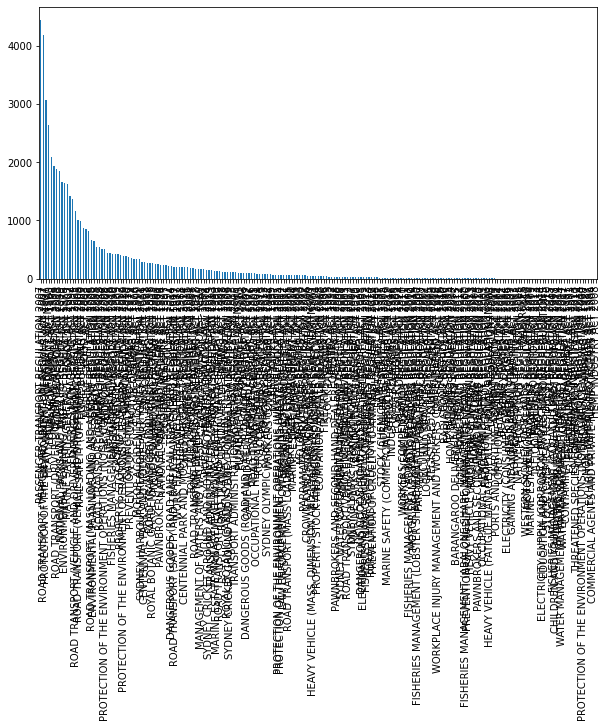

In [ ]:
pdvc = penalty_data.LEGISLATION.value_counts() 
pdvc[pdvc < 5000].plot(kind="bar");

This pattern keeps repeating itself:

<AxesSubplot:>

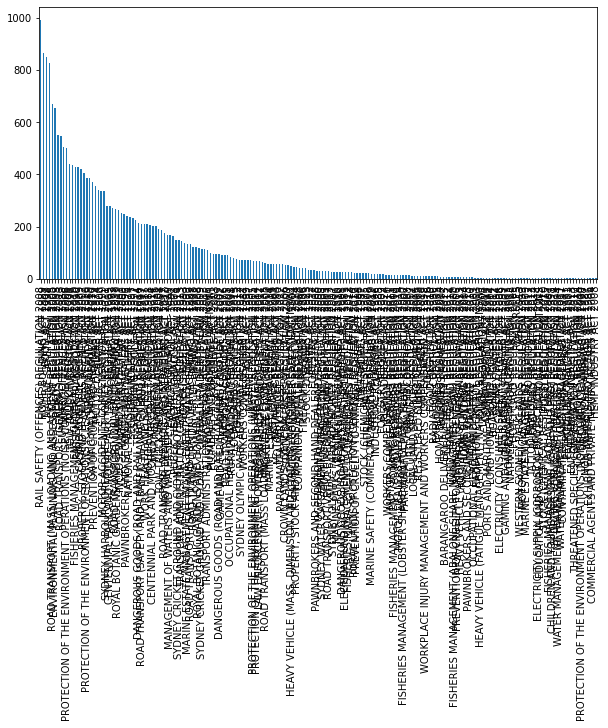

In [ ]:
pdvc[pdvc < 1000].plot(kind="bar")

<AxesSubplot:>

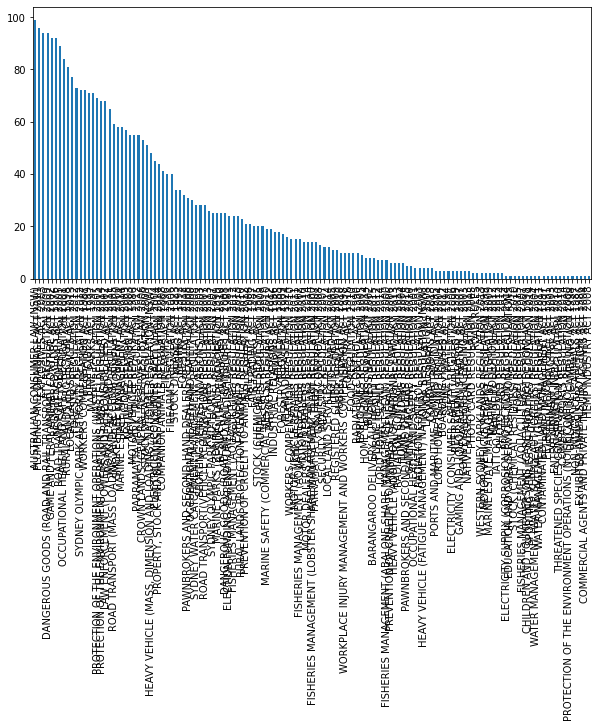

In [ ]:
pdvc[pdvc < 100].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

<AxesSubplot:>

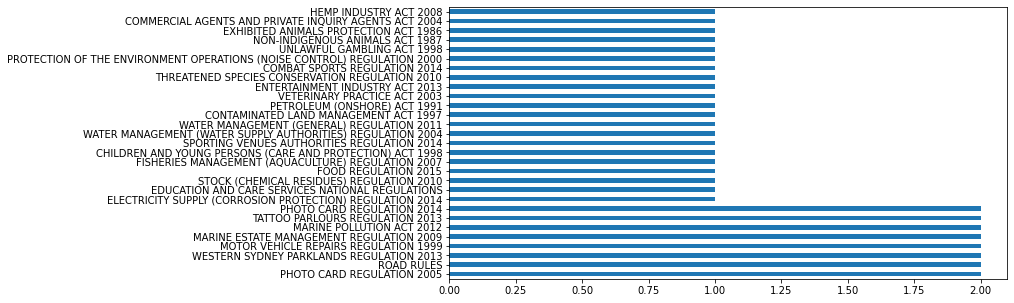

In [ ]:
pdvc[pdvc < 3].plot(kind="barh")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


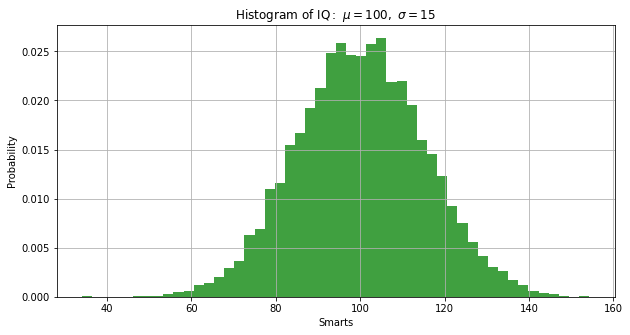

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<AxesSubplot:>

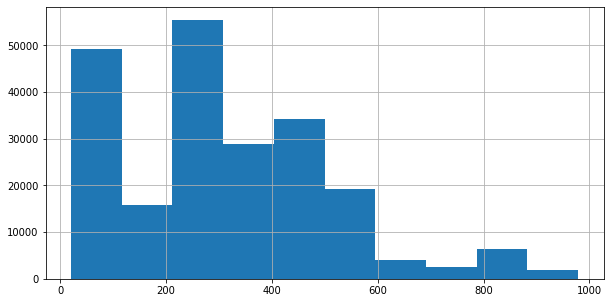

In [ ]:
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000].hist()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

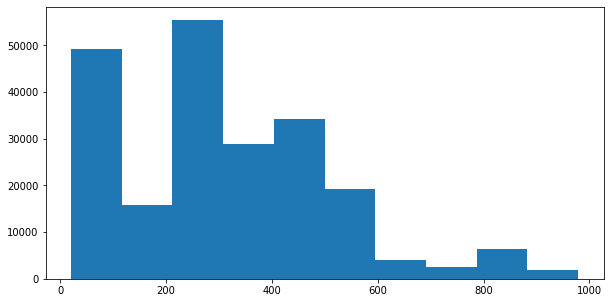

In [ ]:
capped_face_value_data = penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000]

plt.hist(capped_face_value_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

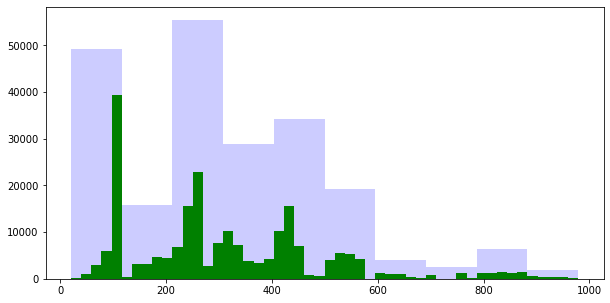

In [ ]:
capped_face_value_data = penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

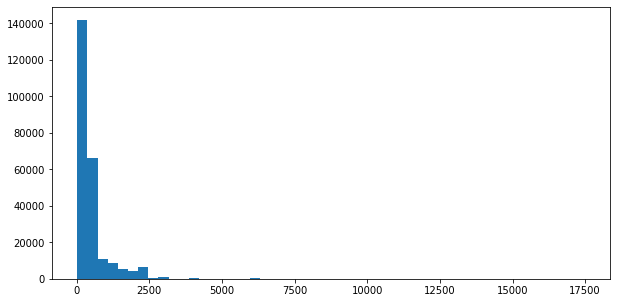

In [ ]:
plt.hist(penalty_data.FACE_VALUE, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

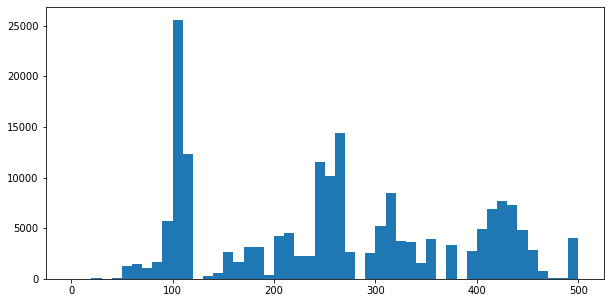

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

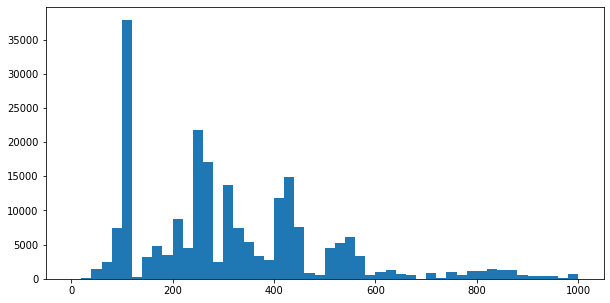

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    penalty_data.FACE_VALUE,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

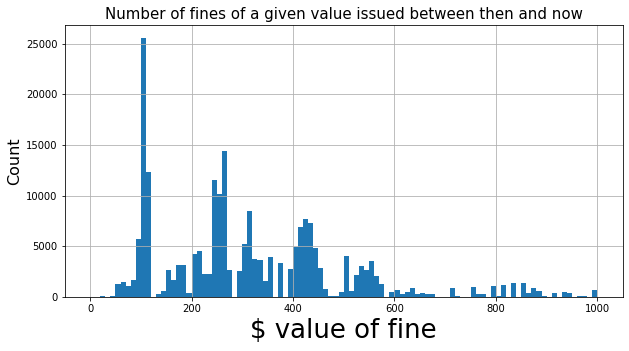

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data.FACE_VALUE, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel("$ value of fine", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()


We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["OFFENCE_MONTH"],
    dayfirst=True,
)
penalty_data.head(2)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... RED_LIGHT_CAMERA_IND SPEED_CAMERA_IND SEATBELT_IND  \
0         7163.0  ...                    Y              NaN          NaN   
1            NaN  ...                  NaN              NaN          NaN   

  MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0              NaN         NaN      NaN      NaN                 NaN   
1              NaN           Y      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE  
0           46       16238  
1           78       20670  

[2 rows x 25 columns]

This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
first_date = penalty_data.OFFENCE_MONTH.min()
last_date = penalty_data.OFFENCE_MONTH.max()
f"range is: {first_date} to {last_date}"


'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

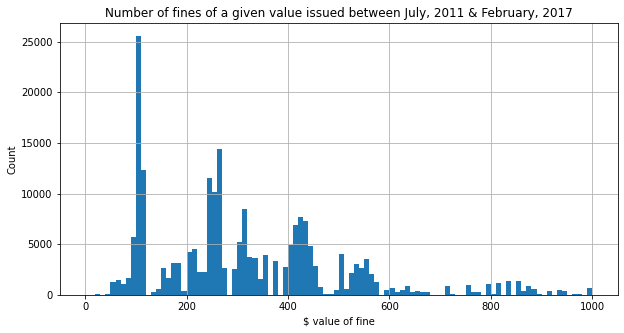

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

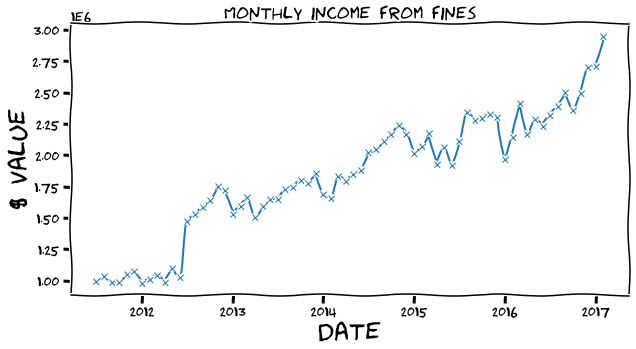

In [ ]:
income = penalty_data[["OFFENCE_MONTH", "FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()


In [ ]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)


<ipython-input-191-beb3bd65b756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... SEATBELT_IND MOBILE_PHONE_IND PARKING_IND CINS_IND  \
0         7163.0  ...          NaN              NaN         NaN      NaN   
1            NaN  ...          NaN              NaN           Y      NaN   

  FOOD_IND BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day day_from_lambda  
0      NaN                 NaN           46       16238   1               1  
1      NaN                 NaN           78       20670   1               1  

[2 rows x 27 columns]

Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND  \
0         7163.0  ...              NaN         NaN      NaN      NaN   

  BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day day_from_lambda  \
0                 NaN           46       16238   1               1   

  day_from_function  
0                 1  

[1 rows x 28 columns]

Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0         7163.0  ...         NaN      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE day day_from_lambda day_from_function nice_day  
0           46       16238   1               1                 1   Friday  

[1 rows x 29 columns]

Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

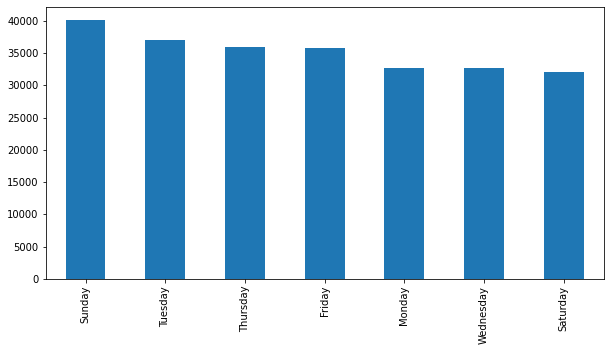

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_